<a href="https://colab.research.google.com/github/ZixrZakuga/UTS_CitraDigital/blob/main/UTS_2206138.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Histogram Citra

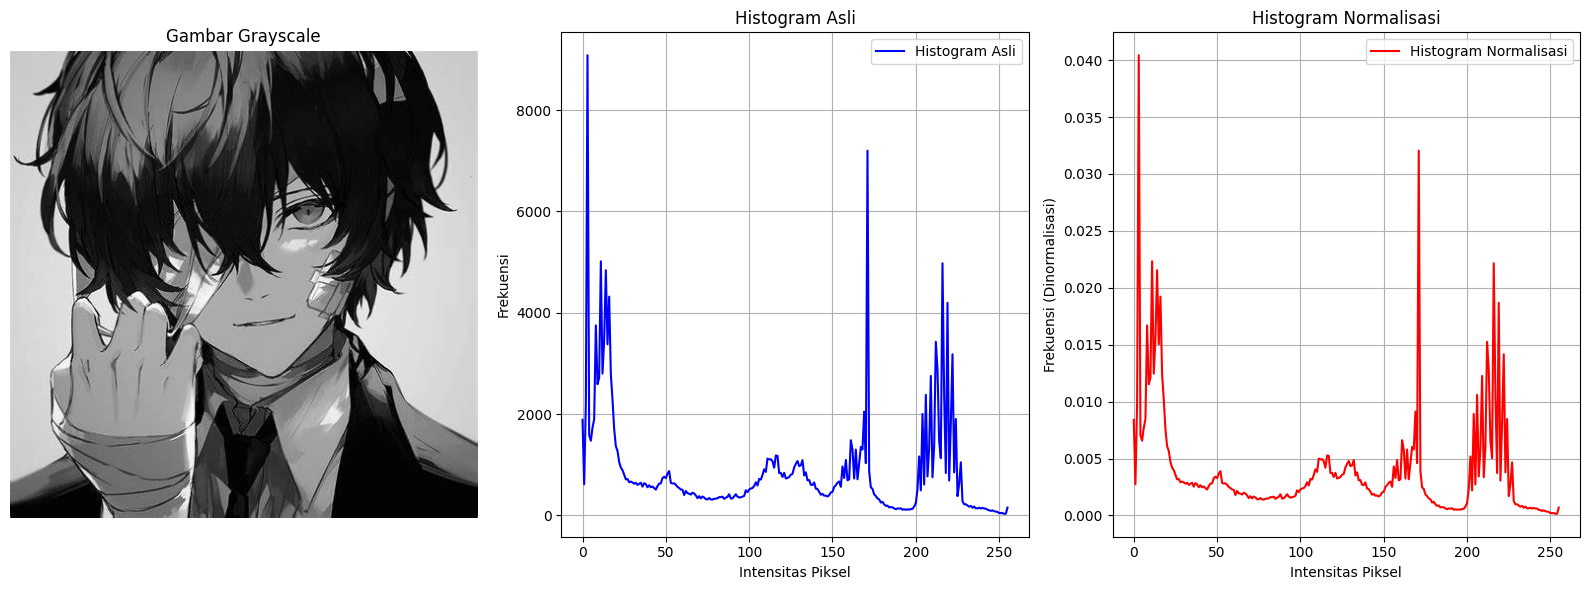

In [5]:
# Langkah 1: Import library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Langkah 2: Membaca gambar dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/UTS/DAZAI.jpeg', cv2.IMREAD_GRAYSCALE)

# Langkah 3: Menghitung histogram
# cv2.calcHist([image], [channel], [mask], [bins], [range])
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Langkah 4: Normalisasi histogram
histogram_normalized = histogram / histogram.sum()

# Langkah 5: Visualisasi hasil
plt.figure(figsize=(16, 6))

# Menampilkan gambar grayscale
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Menampilkan histogram asli
plt.subplot(1, 3, 2)
plt.plot(histogram, color='blue', label='Histogram Asli')
plt.title('Histogram Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.grid()
plt.legend()

# Menampilkan histogram normalisasi
plt.subplot(1, 3, 3)
plt.plot(histogram_normalized, color='red', label='Histogram Normalisasi')
plt.title('Histogram Normalisasi')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi (Dinormalisasi)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



### 2. Operasi Konvolusi dengan Kernel Sederhana

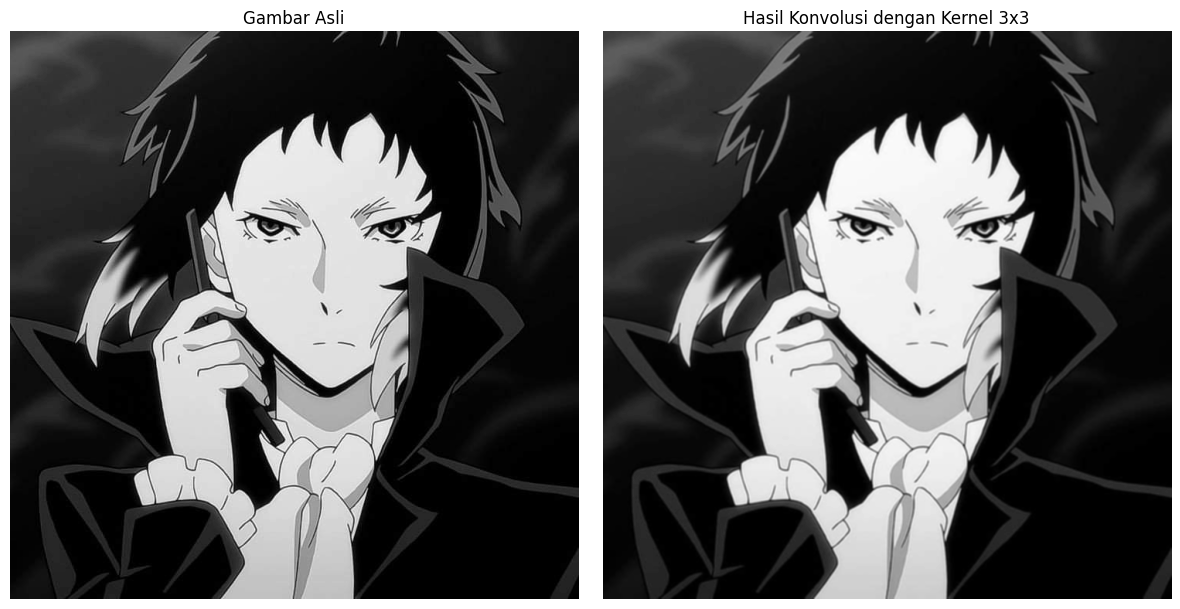

In [12]:
# Langkah 1: Import library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Langkah 2: Membaca gambar dalam format grayscale

image = cv2.imread('/content/drive/MyDrive/UTS/AKUTAGAWA.jpeg', cv2.IMREAD_GRAYSCALE)

# Langkah 3: Mendefinisikan kernel rata-rata 3x3
kernel = np.ones((3, 3), np.float32) / 9

# Langkah 4: Melakukan operasi konvolusi
convoluted_image = cv2.filter2D(image, -1, kernel)

# Langkah 5: Visualisasi hasil
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Hasil konvolusi
plt.subplot(1, 2, 2)
plt.imshow(convoluted_image, cmap='gray')
plt.title('Hasil Konvolusi dengan Kernel 3x3')
plt.axis('off')

plt.tight_layout()
plt.show()



### 3. Transformasi Fourier

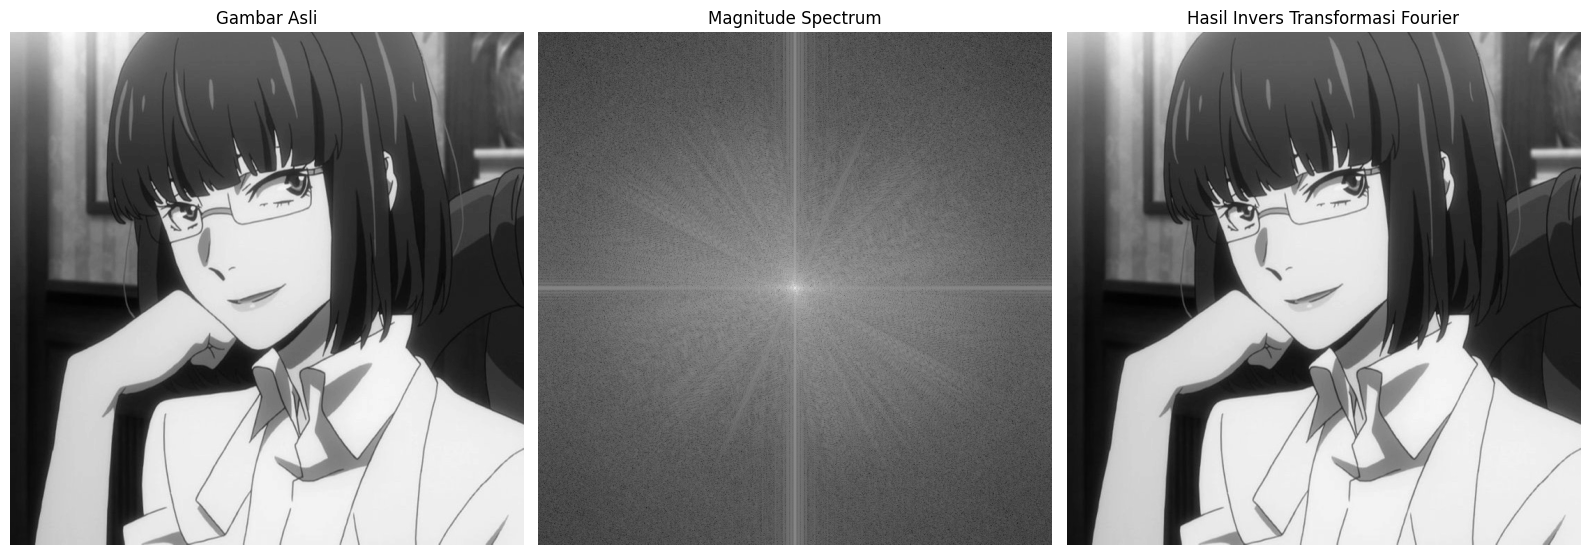

In [13]:
# Langkah 1: Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 2: Membaca gambar dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/UTS/AKIKO.jpg', cv2.IMREAD_GRAYSCALE)

# Langkah 3: Transformasi Fourier
# cv2.dft menghasilkan array kompleks (dua channel untuk real dan imajiner)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Langkah 4: Magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Langkah 5: Invers Transformasi Fourier
# Membalikkan shift pada spektrum
dft_ishift = np.fft.ifftshift(dft_shift)
# Mengembalikan ke domain spasial
image_reconstructed = cv2.idft(dft_ishift)
image_reconstructed = cv2.magnitude(image_reconstructed[:, :, 0], image_reconstructed[:, :, 1])

# Langkah 6: Visualisasi hasil
plt.figure(figsize=(16, 8))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Magnitude spectrum
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

# Gambar hasil invers transformasi
plt.subplot(1, 3, 3)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Hasil Invers Transformasi Fourier')
plt.axis('off')

plt.tight_layout()
plt.show()



### 4. Operasi Aritmatika Citra - Pencerahan

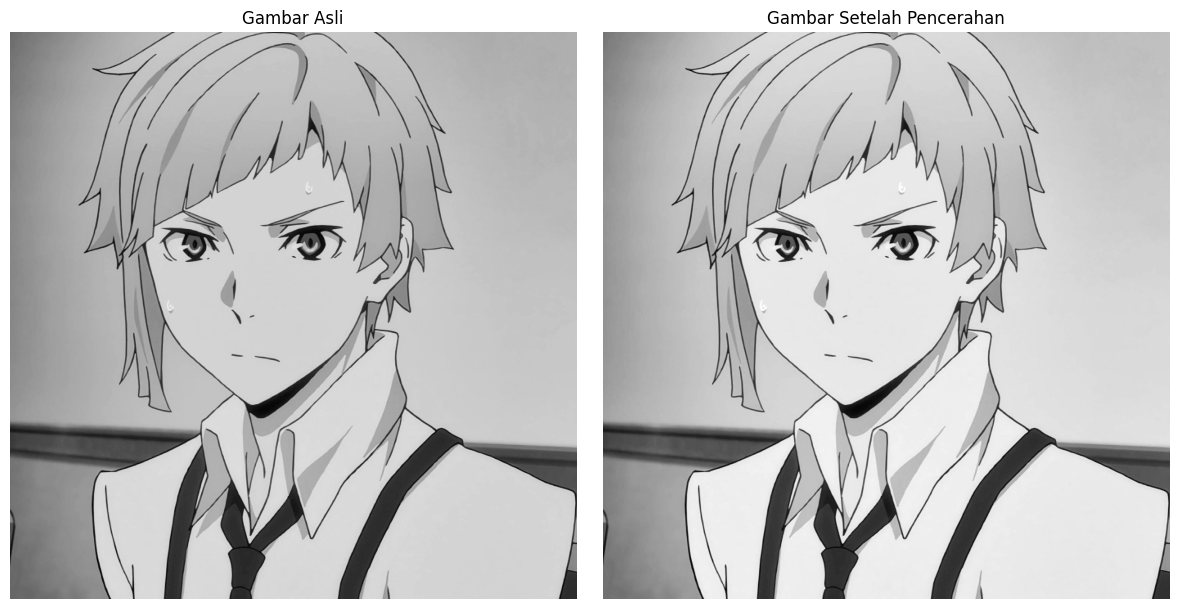

In [14]:
# Langkah 1: Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 2: Membaca gambar dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/UTS/ATSUSHI.jpg', cv2.IMREAD_GRAYSCALE)

# Langkah 3: Menambahkan konstanta untuk pencerahan
# Definisikan nilai konstanta
brightness_constant = 50

# Operasi penambahan dengan clipping
brightened_image = cv2.add(image, np.full_like(image, brightness_constant))

# Langkah 4: Visualisasi hasil
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Hasil pencerahan
plt.subplot(1, 2, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title('Gambar Setelah Pencerahan')
plt.axis('off')

plt.tight_layout()
plt.show()
